In [ ]:
! pip install transformers==4.15.0 sentence-transformers datasets

In [ ]:
from datasets import load_dataset
data = load_dataset('emotion', split='train')

Using custom data configuration default
Reusing dataset emotion (/root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


In [ ]:
data["label"]

[0,
 0,
 3,
 2,
 3,
 0,
 5,
 4,
 1,
 2,
 0,
 1,
 3,
 0,
 1,
 1,
 0,
 0,
 0,
 4,
 3,
 4,
 1,
 1,
 3,
 0,
 0,
 0,
 3,
 1,
 1,
 4,
 5,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 3,
 1,
 0,
 3,
 4,
 1,
 0,
 0,
 5,
 1,
 1,
 1,
 2,
 4,
 4,
 5,
 3,
 3,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 3,
 0,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 0,
 4,
 2,
 3,
 0,
 3,
 2,
 0,
 1,
 1,
 0,
 3,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 4,
 4,
 4,
 0,
 2,
 1,
 1,
 2,
 4,
 5,
 1,
 1,
 1,
 1,
 3,
 4,
 1,
 3,
 2,
 3,
 0,
 1,
 0,
 3,
 1,
 5,
 0,
 3,
 3,
 0,
 1,
 4,
 1,
 1,
 4,
 0,
 5,
 5,
 1,
 3,
 4,
 3,
 0,
 3,
 0,
 4,
 0,
 1,
 5,
 4,
 1,
 3,
 1,
 3,
 1,
 4,
 4,
 0,
 1,
 1,
 0,
 5,
 1,
 4,
 1,
 0,
 1,
 1,
 1,
 4,
 1,
 5,
 1,
 3,
 0,
 0,
 1,
 3,
 0,
 1,
 1,
 5,
 1,
 4,
 1,
 4,
 0,
 4,
 2,
 0,
 4,
 2,
 0,
 0,
 3,
 1,
 2,
 3,
 0,
 5,
 3,
 1,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 3,
 5,
 1,
 3,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,


In [ ]:
data.set_format("pandas")

In [ ]:
df = data[:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Sentence Transformer Embeddings

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import numpy as np

In [ ]:
def embedding_generator(df_path, model):
  tqdm.pandas()
  model = SentenceTransformer(model)
  df['Embeddings'] = df['text'].progress_apply(lambda x: model.encode(x))
  return df

In [ ]:
def inputgen(df):
  a = []
  for i in tqdm(range(len(df))):
    a.append(np.array(df["Embeddings"][i]))
  a = np.array(a)
  print(a.shape)
  return a

In [ ]:
df = df[0:2000]

In [ ]:
model1 = "sentence-transformers/all-MiniLM-L6-v2" 
inputgen_input = embedding_generator(df, model1)
print("Model 1 embedding completed")
embed_output = inputgen(inputgen_input)
print("Model 1 array completed")

100%|██████████| 2000/2000 [00:13<00:00, 149.65it/s]


Model 1 embedding completed


100%|██████████| 2000/2000 [00:00<00:00, 69706.98it/s]

(2000, 384)
Model 1 array completed


In [ ]:
embed = pd.DataFrame(embed_output)
df = pd.concat([df, embed], axis=1)
df

,text,label,Embeddings,0,1,2,3,4,5,6,...,374,375,376,377,378,379,380,381,382,383
0,i didnt feel humiliated,0,"[-0.055050932, -0.007696963, 0.06353026, -0.03...",-0.055051,-0.007697,0.063530,-0.039664,0.116901,-0.123296,0.058080,...,0.063319,-0.044138,-0.034640,0.021249,-0.029084,0.084679,0.016152,0.015425,-0.135161,-0.064534
1,i can go from feeling so hopeless to so damned...,0,"[0.009238882, -0.05296433, 0.01926256, 0.03402...",0.009239,-0.052964,0.019263,0.034021,0.125202,0.027428,0.077058,...,-0.016320,-0.024402,-0.044897,0.132352,-0.082222,0.003469,0.095559,-0.060182,-0.027176,-0.026275
2,im grabbing a minute to post i feel greedy wrong,3,"[-0.074502885, -0.010641884, -0.0034595674, -0...",-0.074503,-0.010642,-0.003460,-0.073246,-0.018509,-0.026024,0.023559,...,0.050347,-0.030673,-0.001018,0.019752,0.078385,-0.010269,0.041514,-0.024779,-0.042020,0.024512
3,i am ever feeling nostalgic about the fireplac...,2,"[0.10859442, 0.09532223, 0.03647684, 0.0151784...",0.108594,0.095322,0.036477,0.015178,0.089073,-0.012647,-0.089686,...,0.019334,-0.076964,-0.004122,0.023587,0.056529,0.024166,0.103731,-0.044091,-0.109329,0.034851
4,i am feeling grouchy,3,"[-0.016712204, -0.07877089, 0.032170087, -0.05...",-0.016712,-0.078771,0.032170,-0.053829,0.115593,-0.051190,0.132093,...,-0.011990,0.003192,-0.077645,-0.016146,0.007182,0.029738,0.059137,-0.062703,-0.019559,-0.057704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,i feel so low and i havent felt this low in a ...,0,"[0.00746265, -0.072956935, 0.06638428, 0.05247...",0.007463,-0.072957,0.066384,0.052478,0.011782,-0.002765,0.015952,...,-0.046977,-0.010428,-0.048182,0.081015,-0.056379,-0.043684,0.059703,-0.061770,-0.076507,-0.000722
1996,i absolutely love this skinny fiber it is doin...,1,"[-0.05117633, -0.04654245, 0.042185836, 0.0601...",-0.051176,-0.046542,0.042186,0.060135,0.005652,-0.068989,0.031247,...,-0.010567,-0.019804,-0.038921,0.050018,-0.011048,0.008017,0.041045,-0.010521,0.005083,-0.002920
1997,i feel as if im in some strange catholic vortex,5,"[0.0092844125, -0.094246, 0.026456287, -0.0027...",0.009284,-0.094246,0.026456,-0.002791,0.047796,-0.070760,0.011053,...,0.087301,-0.005810,0.040688,0.020890,-0.022804,-0.063676,0.061230,-0.020718,-0.048927,-0.092958
1998,i have a feeling that many of you will be surp...,5,"[0.11245156, -0.03292613, 0.11352201, -0.03423...",0.112452,-0.032926,0.113522,-0.034240,0.062835,0.008078,0.031408,...,0.096730,0.014149,-0.011893,0.077310,-0.106346,0.016515,0.078990,0.053615,-0.086291,-0.006568


# Embeddings Dimensionality Reduction

In [ ]:
! pip install umap-learn

In [ ]:
from umap import UMAP
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import numpy as np

In [ ]:
def embedding_generator(df_path, model):
  tqdm.pandas()
  model = SentenceTransformer(model)
  df['Embeddings'] = df['text'].progress_apply(lambda x: model.encode(x))
  return df

In [ ]:
def inputgen(df):
  a = []
  for i in tqdm(range(len(df))):
    a.append(np.array(df["Embeddings"][i]))
  a = np.array(a)
  print(a.shape)
  return a

In [ ]:
def dimensionality_reduction(embed_arr, label):
  X_scaled = MinMaxScaler().fit_transform(embed_arr)
  mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
  df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
  df_emb["label"] = label
  print(df_emb)
  return df_emb

In [ ]:
model1 = "sentence-transformers/all-MiniLM-L6-v2" 
inputgen_input = embedding_generator(df, model1)
print("Embedding completed")
embed_output = inputgen(inputgen_input)
print("Array completed")
dim_emb_out = dimensionality_reduction(embed_output, df["label"])
print("UMAP completed")

100%|██████████| 2000/2000 [00:14<00:00, 137.54it/s]


Embedding completed


100%|██████████| 2000/2000 [00:00<00:00, 71517.18it/s]


(2000, 384)
Array completed
             X          Y  label
0     4.410917  10.360144      0
1     7.095046  11.037721      0
2     6.351001   9.905983      3
3     8.679171   9.845695      2
4     5.573699  12.767012      3
...        ...        ...    ...
1995  6.500954  11.825342      0
1996  9.314243  11.284079      1
1997  6.900813   9.577901      5
1998  8.642849   9.790328      5
1999  7.501454   8.454765      1

[2000 rows x 3 columns]
UMAP completed


In [ ]:
dim_emb_out

,X,Y,label
0,4.410917,10.360144,0
1,7.095046,11.037721,0
2,6.351001,9.905983,3
3,8.679171,9.845695,2
4,5.573699,12.767012,3
...,...,...,...
1995,6.500954,11.825342,0
1996,9.314243,11.284079,1
1997,6.900813,9.577901,5
1998,8.642849,9.790328,5


# Visualization of Embeddings

In [ ]:
import matplotlib.pyplot as plt

             X          Y  label
0     4.410917  10.360144      0
1     7.095046  11.037721      0
5     6.884747  12.149796      0
10    5.573589  10.928417      0
13    7.363647  12.668382      0
...        ...        ...    ...
1983  7.338718   7.762202      0
1987  6.602554   9.052503      0
1989  6.382240  10.995190      0
1992  7.367487  11.797047      0
1995  6.500954  11.825342      0

[544 rows x 3 columns]
             X          Y  label
8     7.892040  10.033929      1
11    7.005034   9.483533      1
14    9.480061   8.485753      1
15    6.398749  12.128724      1
22    6.625608   7.409938      1
...        ...        ...    ...
1988  8.608582  11.570669      1
1991  9.189944   9.329336      1
1993  6.085050   9.369851      1
1996  9.314243  11.284079      1
1999  7.501454   8.454765      1

[702 rows x 3 columns]
             X          Y  label
3     8.679171   9.845695      2
9     5.858622   8.135866      2
47    7.230072   8.507003      2
61    5.531404  12.353902   

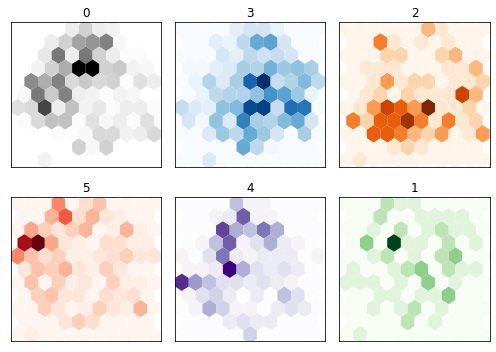

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels =df["label"].unique()
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = dim_emb_out.query(f"label == {i}")
    print(df_emb_sub)
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=10, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()